In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import os
import math
from tqdm.notebook import tqdm

import numpy as np: Mengimpor pustaka NumPy yang digunakan untuk operasi matematika dan manipulasi array multidimensi.
import matplotlib.pyplot as plt: Mengimpor modul pyplot dari pustaka Matplotlib, yang digunakan untuk visualisasi data, termasuk plot grafik.
import cv2 as cv: Mengimpor modul cv2 dari pustaka OpenCV (Open Source Computer Vision Library), yang digunakan untuk pemrosesan gambar dan penglihatan komputer.
import pandas as pd: Mengimpor pustaka pandas yang digunakan untuk analisis data, terutama dalam bentuk struktur data seperti DataFrame.
import os: Mengimpor modul os yang menyediakan fungsi-fungsi untuk berinteraksi dengan sistem operasi, seperti mengakses file dan direktori.
import math: Mengimpor modul math yang menyediakan fungsi matematika dasar.
from tqdm.notebook import tqdm: Mengimpor fungsi tqdm dari modul tqdm.notebook yang digunakan untuk menciptakan bar kemajuan (progress bar) saat melakukan iterasi.

In [3]:
def insertGambar(folder):
    images = [] 
    filenames = [] 
    labels = [] 

    for label in os.listdir(folder): 
        for filename in os.listdir("dataset/"+label): 
            img = cv.imread(os.path.join("dataset/"+label,filename),255) 
            filenames.append(filename) 
            labels.append(label) 
            if img is not None: 
                width = 256
                height = 256
                dim = (width, height)
                resized = cv.resize(img, dim, interpolation=cv.INTER_AREA)
                images.append(resized) 
    return images, filenames, labels 

images, filenames, labels = insertGambar("dataset") 

images = []: Membuat sebuah list kosong yang akan digunakan untuk menyimpan gambar-gambar yang dimuat.
filenames = []: Membuat sebuah list kosong yang akan digunakan untuk menyimpan nama file gambar yang dimuat.
labels = []: Membuat sebuah list kosong yang akan digunakan untuk menyimpan label (nama folder) dari setiap gambar yang dimuat.
for label in os.listdir(folder):: Melakukan iterasi pada setiap label (nama folder) dalam direktori yang ditentukan oleh parameter folder.
for filename in os.listdir("dataset/"+label):: Melakukan iterasi pada setiap nama file dalam folder yang sesuai dengan label saat ini.
img = cv.imread(os.path.join("dataset/"+label,filename),255): Membaca gambar menggunakan fungsi cv.imread() dari pustaka OpenCV. Path file gambar dibentuk dengan menggabungkan direktori "dataset/" dengan label dan nama file saat ini. Argumen kedua (255) digunakan untuk mengatur bendera cv.IMREAD_UNCHANGED, yang memastikan bahwa citra dimuat dengan keaslian warna yang utuh (tanpa perubahan skala ke abu-abu).
filenames.append(filename): Menambahkan nama file saat ini ke dalam list filenames.
labels.append(label): Menambahkan label saat ini ke dalam list labels.
if img is not None:: Memeriksa apakah citra berhasil dibaca dan tidak bernilai None.
width = 256 dan height = 256: Menentukan lebar dan tinggi yang diinginkan untuk gambar yang akan diresize.
dim = (width, height): Membentuk tupel dim yang berisi lebar dan tinggi.

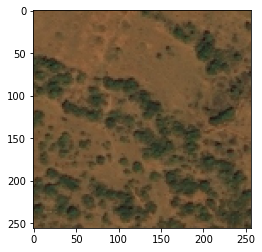

In [10]:
plt.imshow(cv.cvtColor(images[1], cv.COLOR_BGR2RGB))

Baris kode plt.imshow(cv.cvtColor(images[1], cv.COLOR_BGR2RGB)) digunakan untuk menampilkan gambar yang telah dimuat menggunakan fungsi insertGambar sebelumnya.

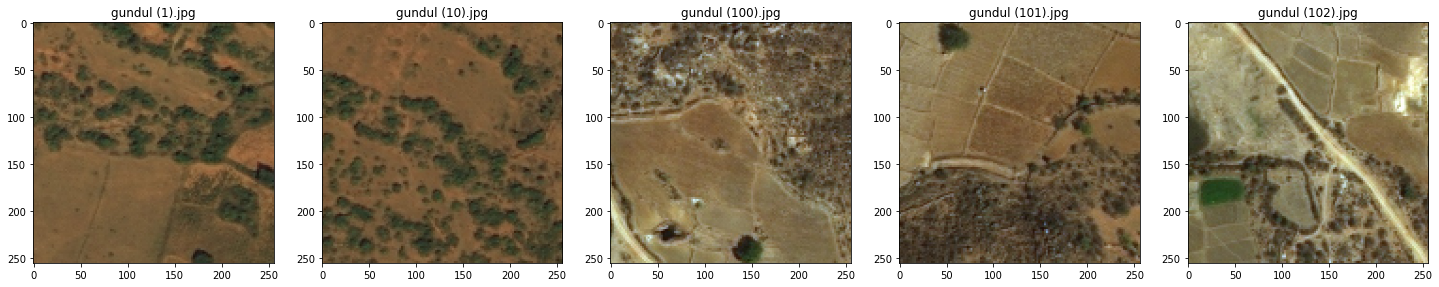

In [12]:
fig = plt.figure(figsize=(25,25))
columns = 5 
rows = 3
x = 0 
for i in range(1,6): 
    fig.add_subplot(rows, columns, i) 
    plt.title(filenames[x]) 
    plt.imshow(cv.cvtColor(images[x], cv.COLOR_BGR2RGB)) 
    x+=1 

fig = plt.figure(figsize=(25,25)): Membuat objek gambar (figure) dengan ukuran 25x25 inci menggunakan figsize=(25,25).
columns = 5 dan rows = 3: Menentukan jumlah kolom dan baris dalam tata letak grid yang akan digunakan untuk menampilkan gambar.
x = 0: Menginisialisasi variabel x sebagai indeks awal untuk mengakses gambar dan nama file.
for i in range(1,6):: Melakukan iterasi dari 1 hingga 5 (inklusif) karena kita ingin menampilkan 5 gambar.
fig.add_subplot(rows, columns, i): Menambahkan subplot ke dalam objek gambar fig dengan tata letak grid yang ditentukan oleh rows, columns, dan nomor subplot i.
plt.title(filenames[x]): Mengatur judul subplot dengan menggunakan nama file gambar yang terkait dengan indeks x.
plt.imshow(cv.cvtColor(images[x], cv.COLOR_BGR2RGB)): Menampilkan gambar yang telah diubah skema warnanya dalam subplot. Gambar yang ditampilkan diambil dari images[x] dengan skema warna RGB.

In [13]:
savePath = "result/resize/"
os.makedirs(savePath, exist_ok=True)  # Membuat direktori "hasil/resize/" jika belum ada
for i in range(len(images)):
    save = os.path.join(savePath, filenames[i])
    save = os.path.splitext(save)[0] + ".jpg"  # Mengganti ekstensi gambar menjadi .jpg
    rgb_image = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)  # Mengubah citra menjadi format warna RGB
    cv.imwrite(save, rgb_image)

savePath = "result/resize/": Menentukan path (jalur) untuk direktori tempat gambar-gambar yang direscale akan disimpan.
os.makedirs(savePath, exist_ok=True): Membuat direktori "result/resize/" jika direktori tersebut belum ada. Parameter exist_ok=True memastikan bahwa tidak ada kesalahan yang muncul jika direktori sudah ada.
for i in range(len(images)):: Melakukan iterasi melalui semua gambar dalam list images.
save = os.path.join(savePath, filenames[i]): Membentuk path file tujuan dengan menggabungkan savePath dan nama file gambar saat ini dari list filenames.
save = os.path.splitext(save)[0] + ".jpg": Mengubah ekstensi file menjadi ".jpg" menggunakan os.path.splitext() yang membagi path file menjadi nama dan ekstensi file. Kemudian, nama file diambil ([0]) dan ekstensinya diganti dengan ".jpg".
rgb_image = cv.cvtColor(images[i], cv.COLOR_BGR2RGB): Mengubah skema warna gambar dari BGR menjadi RGB menggunakan cv.cvtColor(). Hal ini diperlukan karena fungsi cv.imwrite() dari OpenCV mengharapkan gambar dengan skema warna RGB.
cv.imwrite(save, rgb_image): Menyimpan gambar dengan menggunakan cv.imwrite(). Gambar disimpan dengan path yang ditentukan oleh save, dengan menggunakan citra RGB yang telah diubah skemanya.

In [7]:
def rotasi(derajat, citra):
    panjang, lebar, _ = citra.shape  # Memperoleh dimensi panjang dan lebar citra
    Rotasi_img = np.zeros(citra.shape)

    sudut = derajat * (np.pi / 180)
    tengahx = panjang / 2
    tengahy = lebar / 2

    for i in range(panjang):
        for j in range(lebar):
            x = int((i - tengahx) * np.cos(sudut) - (j - tengahy) * np.sin(sudut) + tengahx)
            y = int((i - tengahx) * np.sin(sudut) + (j - tengahy) * np.cos(sudut) + tengahy)
            if 0 <= x < panjang and 0 <= y < lebar:
                Rotasi_img[i][j] = citra[x][y]

    return Rotasi_img

panjang, lebar, _ = citra.shape: Memperoleh dimensi panjang (height), lebar (width), dan jumlah saluran warna (channels) dari citra. Karena kita tidak memerlukan jumlah saluran warna dalam implementasi rotasi ini, kita mengabaikan nilai tersebut dengan menggunakan _.
Rotasi_img = np.zeros(citra.shape): Membuat array kosong dengan dimensi yang sama dengan citra. Array ini akan digunakan untuk menyimpan citra hasil rotasi.
sudut = derajat * (np.pi / 180): Mengkonversi sudut rotasi dari derajat ke radian.
tengahx = panjang / 2 dan tengahy = lebar / 2: Menentukan titik tengah citra sebagai pusat rotasi.
Melakukan iterasi pada setiap piksel citra menggunakan dua loop nested (for i in range(panjang) dan for j in range(lebar)).
x = int((i - tengahx) * np.cos(sudut) - (j - tengahy) * np.sin(sudut) + tengahx) dan y = int((i - tengahx) * np.sin(sudut) + (j - tengahy) * np.cos(sudut) + tengahy): Menghitung koordinat piksel hasil rotasi dengan menggunakan persamaan transformasi rotasi.
if 0 <= x < panjang and 0 <= y < lebar:: Memeriksa apakah koordinat piksel hasil rotasi berada dalam batas citra asli.
Rotasi_img[i][j] = citra[x][y]: Mengisi piksel hasil rotasi dengan piksel citra asli yang sesuai.
Mengembalikan citra hasil rotasi, yaitu Rotasi_img.

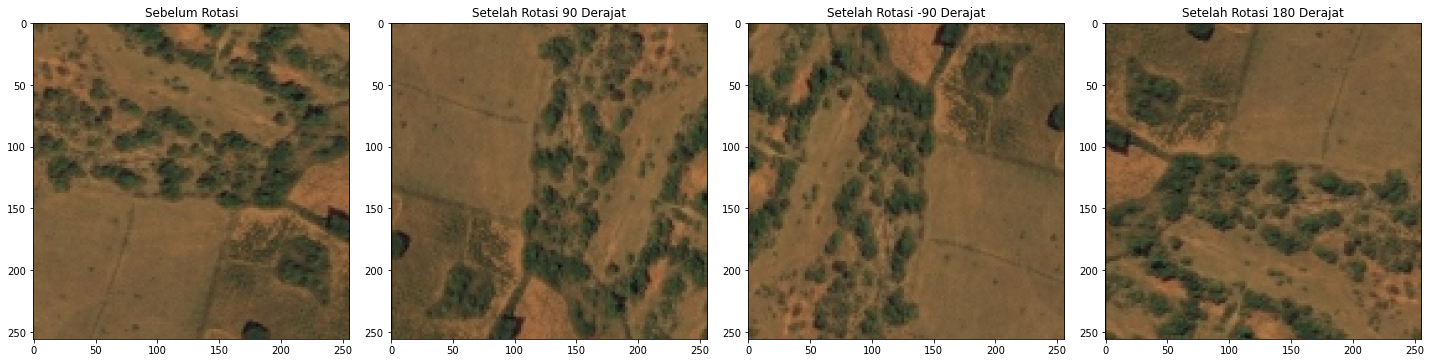

In [8]:
sudut_rotasi = [90, -90, 180]  # Sudut rotasi yang ingin ditampilkan
index_citra = 0  # Indeks citra yang ingin ditampilkan

# Mengambil citra yang dipilih
citra = images[index_citra]

plt.figure(figsize=(20,20))

# Menampilkan citra sebelum rotasi
plt.subplot(1, 4, 1)
plt.imshow(cv.cvtColor(citra, cv.COLOR_BGR2RGB)) 
plt.title('Sebelum Rotasi')

# Menampilkan citra dengan sudut rotasi tertentu
for i, sudut in enumerate(sudut_rotasi):
    rotated_image = rotasi(sudut, citra)
    rotated_image = np.clip(rotated_image, 0, 255).astype(np.uint8)  # Memastikan rentang piksel valid [0, 255]
    plt.subplot(1, 4, i+2)
    plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB)) 
    plt.title(f'Setelah Rotasi {sudut} Derajat')

plt.tight_layout()
plt.show()

Fungsi rotasi yang Anda berikan mengimplementasikan rotasi citra menggunakan transformasi geometri. Fungsi tersebut memiliki dua parameter:
derajat: Sudut rotasi dalam derajat.
citra: Citra yang akan dirotasi.
Fungsi ini akan menghasilkan citra yang dirotasi sebesar sudut yang ditentukan.

In [9]:
savePath = "result/rotasi/"  # Ubah path ke folder hasil rotasi sesuai kebutuhan
sudut_rotasi = [90, -90, 180]  # Sudut rotasi yang ingin Anda terapkan
rotasi_data = []  # List untuk menyimpan citra hasil rotasi
os.makedirs(savePath, exist_ok=True)
for i in range(len(images)):
    for sudut in sudut_rotasi:
        # Menerapkan rotasi pada citra
        rgb_image = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)
        hasil_rotasi = rotasi(sudut, rgb_image)  # Menggunakan sudut rotasi dari daftar sudut_rotasi

        # Menyimpan citra hasil rotasi
        save = savePath + f"{filenames[i]}_{sudut}.jpg"  # Menambahkan sudut rotasi pada nama file
        cv.imwrite(save, hasil_rotasi)

        # Menyimpan citra hasil rotasi ke dalam list rotasi_data
        rotasi_data.append(hasil_rotasi)

savePath = "result/rotasi/": Menentukan path (lokasi) folder tempat citra hasil rotasi akan disimpan. Anda perlu mengubah savePath sesuai dengan kebutuhan.
sudut_rotasi = [90, -90, 180]: Menentukan daftar sudut rotasi yang ingin diterapkan pada setiap citra. Anda dapat menambahkan atau mengubah sudut rotasi sesuai keinginan.
rotasi_data = []: Membuat list kosong rotasi_data yang akan digunakan untuk menyimpan citra hasil rotasi.
os.makedirs(savePath, exist_ok=True): Membuat direktori yang ditentukan oleh savePath jika belum ada.
Melakukan iterasi pada setiap citra dalam images menggunakan range(len(images)).
Di dalam loop, melakukan iterasi pada setiap sudut rotasi dalam sudut_rotasi menggunakan for sudut in sudut_rotasi.
Mengkonversi citra ke skema warna RGB menggunakan cv.cvtColor(images[i], cv.COLOR_BGR2RGB).
Menerapkan rotasi pada citra menggunakan fungsi rotasi(sudut, rgb_image).
Menyimpan citra hasil rotasi dengan menambahkan sudut rotasi pada nama file menggunakan savePath + f"{filenames[i]}_{sudut}.jpg". Anda dapat mengubah format nama file sesuai kebutuhan.
Menyimpan citra hasil rotasi ke dalam list rotasi_data menggunakan rotasi_data.append(hasil_rotasi).

In [25]:
def enhance_image(image):
    enhanced_image_rgb = np.zeros_like(image)
    for channel in range(3):
        enhanced_image_rgb[:, :, channel] = cv.equalizeHist(image[:, :, channel])
    return enhanced_image_rgb


enhanced_image_rgb = np.zeros_like(image): Membuat array nol dengan dimensi yang sama dengan citra image. Array ini akan digunakan untuk menyimpan citra hasil pemrosesan.
Melakukan iterasi pada setiap saluran warna (channel) citra menggunakan for channel in range(3). Dalam citra berwarna, saluran warna biasanya terdiri dari tiga saluran: merah (R), hijau (G), dan biru (B).
enhanced_image_rgb[:, :, channel] = cv.equalizeHist(image[:, :, channel]): Menerapkan equalization histogram pada saluran warna (channel) saat ini. Equalization histogram digunakan untuk meningkatkan kontras dan distribusi nilai piksel dalam saluran warna tersebut.
Mengembalikan citra hasil pemrosesan yang telah ditingkatkan kontrasnya, yaitu enhanced_image_rgb.

In [26]:
savePath = "result/enhanced/"
enhanced_data = [] 
os.makedirs(savePath, exist_ok=True)
for i in range(len(images)):
    # rgb_image = cv.cvtColor(images[i], cv.COLOR_BGR2RGB) 
    enhanced_image = enhance_image(images[i])
    save = savePath + filenames[i] + ".jpg"
    cv.imwrite(save, enhanced_image)
    enhanced_data.append(enhanced_image)

savePath = "result/enhanced/": Menentukan path (lokasi) folder tempat citra hasil pemrosesan akan disimpan. Anda perlu mengubah savePath sesuai dengan kebutuhan.
enhanced_data = []: Membuat list kosong enhanced_data yang akan digunakan untuk menyimpan citra hasil pemrosesan.
os.makedirs(savePath, exist_ok=True): Membuat direktori yang ditentukan oleh savePath jika belum ada.
Melakukan iterasi pada setiap citra dalam images menggunakan range(len(images)).
enhanced_image = enhance_image(images[i]): Meningkatkan kontras citra menggunakan fungsi enhance_image dengan citra saat ini sebagai input.
save = savePath + filenames[i] + ".jpg": Menentukan path (lokasi) file untuk menyimpan citra hasil pemrosesan. Nama file disusun dengan menggabungkan savePath, nama file asli filenames[i], dan ekstensi file .jpg.
cv.imwrite(save, enhanced_image): Menyimpan citra hasil pemrosesan ke dalam file menggunakan cv.imwrite.
enhanced_data.append(enhanced_image): Menambahkan citra hasil pemrosesan ke dalam list enhanced_data.

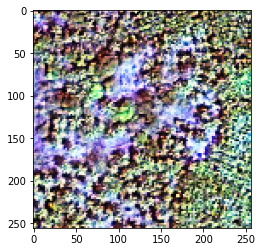

In [31]:
plt.imshow(enhanced_data[288])

 plt.imshow(enhanced_data[288]) digunakan untuk menampilkan citra hasil pemrosesan yang telah ditingkatkan kontrasnya dari list enhanced_data.

In [16]:
def color_segmentation(image):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    lower_green = np.array([36, 40, 40])
    upper_green = np.array([70, 255, 255])
    mask = cv.inRange(hsv, lower_green, upper_green)
    segmented_image = cv.bitwise_and(image, image, mask=mask)
    return segmented_image


hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV): Mengkonversi citra dari skema warna BGR ke HSV. Model warna HSV (Hue, Saturation, Value) memungkinkan pemisahan warna berdasarkan nuansa (hue), kejenuhan (saturation), dan nilai (value).
lower_green = np.array([36, 40, 40]) dan upper_green = np.array([70, 255, 255]): Menentukan rentang nilai HSV yang mewakili warna hijau. Rentang ini ditentukan dengan menggunakan eksperimen atau pengetahuan tentang rentang nilai HSV untuk warna hijau.
mask = cv.inRange(hsv, lower_green, upper_green): Membuat mask (maskara) dengan menggunakan fungsi cv.inRange untuk memisahkan piksel yang memiliki nilai HSV yang berada dalam rentang yang ditentukan sebagai warna hijau.
segmented_image = cv.bitwise_and(image, image, mask=mask): Menerapkan operasi bitwise AND antara citra asli (image) dan maskara (mask) untuk memperoleh citra hasil segmentasi warna. Operasi ini akan menghasilkan citra di mana hanya piksel-piksel yang sesuai dengan maskara yang akan tetap ditampilkan, sedangkan piksel lainnya akan menjadi hitam.
Mengembalikan citra hasil segmentasi warna, yaitu segmented_image.

In [18]:
savePath = "result/segmentation/"
segmentation_data = [] 
os.makedirs(savePath, exist_ok=True)
for i in range(len(images)):
    # rgb_image = cv.cvtColor(images[i], cv.COLOR_BGR2RGB) 
    segmentation_image = color_segmentation(images[i])
    save = savePath + filenames[i] + ".jpg"
    cv.imwrite(save, segmentation_image)
    segmentation_data.append(segmentation_image)

savePath = "result/segmentation/": Menentukan path (lokasi) folder tempat citra hasil segmentasi akan disimpan. Anda perlu mengubah savePath sesuai dengan kebutuhan.
segmentation_data = []: Membuat list kosong segmentation_data yang akan digunakan untuk menyimpan citra hasil segmentasi.
os.makedirs(savePath, exist_ok=True): Membuat direktori yang ditentukan oleh savePath jika belum ada.
Melakukan iterasi pada setiap citra dalam images menggunakan range(len(images)).
segmentation_image = color_segmentation(images[i]): Melakukan segmentasi warna pada citra menggunakan fungsi color_segmentation dengan citra saat ini sebagai input.
save = savePath + filenames[i] + ".jpg": Menentukan path (lokasi) file untuk menyimpan citra hasil segmentasi. Nama file disusun dengan menggabungkan savePath, nama file asli filenames[i], dan ekstensi file .jpg.
cv.imwrite(save, segmentation_image): Menyimpan citra hasil segmentasi ke dalam file menggunakan cv.imwrite.
segmentation_data.append(segmentation_image): Menambahkan citra hasil segmentasi ke dalam list segmentation_data.

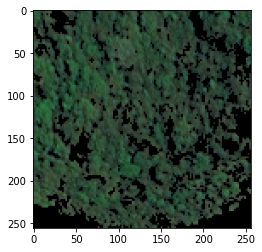

In [21]:
plt.imshow(segmentation_data[224])

plt.imshow() fungsi dari matplotlib untuk menampilkan gambar tersegmentasi.

In [22]:
def image_median_filtering(image, kernel_size=3):
    filtered_image = cv.medianBlur(image, kernel_size)
    return filtered_image

image: Citra yang akan diterapkan median filtering.
kernel_size=3: Ukuran kernel (bilangan ganjil) yang digunakan untuk operasi median filtering. Nilai ini menentukan jangkauan tetangga piksel yang akan digunakan untuk menghitung nilai piksel yang baru.
filtered_image = cv.medianBlur(image, kernel_size): Menerapkan operasi median filtering pada citra menggunakan fungsi cv.medianBlur. Operasi ini akan menggantikan setiap piksel dengan nilai median dari piksel-piksel tetangganya di dalam kernel.
Mengembalikan citra yang telah diterapkan median filtering, yaitu filtered_image.

In [24]:
savePath = "result/filtering/"
filtering_data = [] 
os.makedirs(savePath, exist_ok=True)
for i in range(len(images)):
    filtering_image = image_median_filtering(images[i])
    save = savePath + filenames[i] + ".jpg"
    cv.imwrite(save, filtering_image)
    filtering_data.append(filtering_image)

pemfilteran median pada setiap gambar dalam daftar gambar menggunakan fungsi image_median_filtering. Gambar yang difilter yang dihasilkan kemudian disimpan dalam folder tertentu yang ditunjukkan oleh savePath. Selain itu, gambar yang difilter disimpan dalam daftar filtering_data untuk diproses lebih lanjut

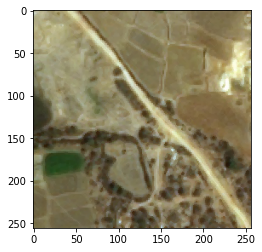

In [14]:
plt.imshow(filtering_data[4])

plt.imshow(filtering_data[4]) digunakan untuk menampilkan gambar yang difilter pada indeks 4 dari daftar filtering_data. Berikut adalah rincian kodenya:
filtering_data[4]: Mengambil gambar yang difilter pada indeks 4 dari daftar filtering_data.
plt.imshow(filtering_data[4]): Menampilkan gambar yang difilter menggunakan fungsi plt.imshow() dari library matplotlib. Fungsi ini digunakan untuk memvisualisasikan gambar.
plt.show(): Menampilkan plot gambar di layar.

In [ ]:
import numpy as np
from skimage.feature import greycomatrix

def compute_glcm(image, distances, angles, levels):
    # Konversi citra ke grayscale
    gray = np.array(image, dtype=np.uint8)
    
    # Menghitung matriks GLCM
    glcm = greycomatrix(gray, distances, angles, levels=levels, symmetric=True, normed=True)
    
    return glcm

# Contoh penggunaan fungsi compute_glcm
image = cv.imread("path/to/your/image.jpg", 0)  # Membaca citra sebagai grayscale
distances = [1]  # Jarak antar-piksel untuk perhitungan GLCM
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Sudut untuk perhitungan GLCM
levels = 256  # Jumlah level intensitas

glcm_matrix = compute_glcm(image, distances, angles, levels)

print("GLCM Matrix:")
print(glcm_matrix)


import numpy as np: Mengimpor pustaka NumPy, yang menyediakan dukungan untuk bekerja dengan array dan operasi matematika.
from skimage.feature import greycomatrix: Mengimpor fungsi greycomatrix dari perpustakaan scikit-image. Fungsi ini digunakan untuk menghitung GLCM.
def compute_glcm(image, distances, angles, levels): Menentukan fungsi compute_glcm, yang mengambil input gambar skala abu-abu, jarak, sudut, dan jumlah level intensitas sebagai parameter.
gray = np.array(image, dtype=np.uint8): Mengonversi gambar input menjadi representasi skala abu-abu menggunakan fungsi array NumPy. Gambar yang dihasilkan disimpan dalam variabel abu-abu.
glcm = greycomatrix(gray, distances, angles, levels=levels, symmetric=True, normed=True): Menghitung GLCM menggunakan fungsi greycomatrix. Dibutuhkan citra grayscale (abu-abu), jarak antar piksel, sudut, dan jumlah level intensitas sebagai input. Argumen symmetric=True dan normed=True menetapkan bahwa matriks GLCM harus simetris dan dinormalisasi.
return glcm: Mengembalikan matriks GLCM yang dihitung.
image = cv.imread("path/to/your/image.jpg", 0): Membaca gambar input dari jalur file yang ditentukan sebagai gambar skala abu-abu menggunakan fungsi cv.imread dari OpenCV.
distances = [1]: Menentukan jarak antar piksel untuk menghitung GLCM. Dalam hal ini, ia menggunakan jarak 1, yang mewakili piksel tetangga terdekat.
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]: Menentukan sudut (dalam radian) di mana GLCM dihitung. Dalam contoh ini, menghitung GLCM pada 0 derajat, 45 derajat, 90 derajat, dan 135 derajat.
level = 256: Menentukan jumlah level intensitas pada gambar grayscale. Dalam hal ini, diasumsikan gambar skala abu-abu dengan 256 tingkat intensitas.
glcm_matrix = compute_glcm(gambar, jarak, sudut, level): Menghitung matriks GLCM dengan memanggil fungsi compute_glcm dengan parameter yang ditentukan.
print("Matriks GLCM:"): Mencetak label yang menunjukkan matriks GLCM.
print(glcm_matrix): Mencetak matriks GLCM yang dihitung.